In [1]:
#importálások
from bs4 import BeautifulSoup
import urllib
import matplotlib
from tqdm import tqdm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from selenium import webdriver

from selenium.webdriver.common.by import By

/Users/nmtks/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#alapbeállítások

user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers = {'User-Agent':user_agent,} 
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers = {'User-Agent':user_agent,}
carlinks=[]
frames=[]

In [3]:
#ezt kicserélheted bármilyen keresési eredmény linkjére
start_link="https://www.hasznaltauto.hu/talalatilista/PCOG2VG3R3RDADH5S56ADFGLZSCMOXNBIVNKDEKWTLL4UUCTIKJRQJLJGWAPR53V3LBDIFKPWWHO36HY4SSCAZY76LTOKNETUKBIAJJZAVNWZREKWGURJ7UKA32QL2SAFU2JOATULK4O34NDOICQN5ANCTQK6YVVSOJ75EEGMEGS4N6KYZBSMUUIOEDL5B4ZQUKFROZ45HN34SWEW3TXZHTKIGD7YBGO2TWTSUSM3PXZWFBFHCYHWBK27ELQKWO4CQ2NSFZZT24UHB72RCAV5JB7URQH5ZCVYAIPFR4YWEWLJBSTQDJQHZ2FB66ACC5VFGUMPJSPNSYPAED4FTF5WOHUWUHD4ETA5LM2IZPSH27IGX66DV7IIY3572IMC77IDK2UPHYI6543YOFSL6VMBHSNY2B7PNIPMT7CUHZ6DUMQVCXMU3UNFS5W5NV3H3NFTA6KIUD65W5B4ZOLWXJACXOXYHSAZOAKOJK4JWQZZM3XXD2R2SHQVVF2Z4YKD2LSGILV2T2Q47NJ6UEPPSBQ2XYEQRKKQJZYCCVFEDK7RTXIWWFLAM5TTBGKRTGZRJASG4ZMDGS7AHMAXFGPONAWWOCTCAVZAC3ZKOO5KW2LFA463YRMYZMRPT3CHTV6E6MM45O3YEFLHMD2ZRQRNWE245TBJQWM3JPPQRHWAW2RSWZXSDP4FRMWX5EYUC6AJK5I2FOKTCVEXHVNMCQ4L63ICAGDRPSGF4X6LKY6XKZBX2GPOSYH6WO5YOVDVCYQVUJDH2DZ3BVEFHHNANM33CVBCHGQTTR6ZZFU6YSUNC26FOZJOZUYMMS5BH2HIQN3E5BEI7SRA77L7YWPYFEHFC7YCSRLSOWBU7YNHQG62BL5PYQFPARWAOPPOTTE635G7WWXA3WYB3H5H6WZTI54"

In [4]:
links=[start_link]
for number in range(2,20):
    newlink=start_link=start_link+"/page"+str(number)
    links.append(newlink)

In [5]:
for link in tqdm(links):
    #Initializing the browser and accepting Youtube's cookies

    #It will open a Safari browser
    driver = webdriver.Safari()
    #Opening a random YT link to get to the 'Accept cookies page'
    driver.get(link)

    #Getting the accept button by xpath
    button = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div/div/div[3]/button[2]')
    #Clicking on the button
    button.click()
    html = driver.page_source

    soup = BeautifulSoup(html)
    box=soup.find('div', {'id':"w34"})
    
    for item in list(box):
        try:
            a=(item.find("a", href=True))
            carlinks.append(a["href"])
        except:
            pass
    driver.quit()

100%|██████████| 19/19 [01:15<00:00,  3.98s/it]


In [6]:
for link in tqdm(carlinks):
    try:
        dflist = pd.read_html(link, index_col=0)
        df = dflist[0].T
        column= df.columns
        lencol = len(column)
        for i in range(0,(lencol-1)):
            torf= (df[(column[i])] == (column[i]))
            if int((torf*1)==0)==0: 
                df=df.drop(columns=[(column[i])], axis=1)
            else:
                pass
        frames.append(df)
        vegleges_tabla = pd.concat(frames)
        vegleges_tabla=vegleges_tabla.reset_index()
        #vegleges_tabla= vegleges_tabla.drop('index',axis=1)
    except:
        pass

100%|██████████| 361/361 [03:05<00:00,  1.95it/s]


In [127]:
frames.append(df)

In [128]:
vegleges_tabla = pd.concat(frames)

In [7]:
vegleges_tabla

"Ár, költségek",index,Vételár:,Vételár EUR:,Évjárat:,Állapot:,Kivitel:,Járműelőélet:,Km. óra állás:,Szállítható szem. száma:,Ajtók száma:,...,Bérlési lehetőség:,Alaptípus ára:,Extrákkal növelt ár:,Akció feltételei:,Garancia:,Átrozsdásodási garancia:,Szavatossági garancia:,Futásidő:,Finanszírozás típusa CASCO-val:,Finanszírozás típusa CASCO nélkül:
0,"Ár, költségek.1",1 350 000 Ft,€ 3 367,2002/6,Normál,Városi terepjáró (crossover),Elérhető autó-előélet alvázszám alapján,245 000 km,4 fő,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Ár, költségek.1",2 990 000 Ft,€ 7 457,2007,Normál,Városi terepjáró (crossover),NaN,265 900 km,5 fő,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Ár, költségek.1",3 000 000 Ft,€ 7 482,2007/5,Normál,Városi terepjáró (crossover),Elérhető autó-előélet alvázszám alapján,238 500 km,5 fő,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ár, költségek.1",3 550 000 Ft,€ 8 853,2009,Kitűnő,Városi terepjáró (crossover),NaN,186 666 km,5 fő,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ár, költségek.1",5 699 999 Ft,€ 14 215,2015/11,Sérülésmentes,Városi terepjáró (crossover),NaN,235 000 km,5 fő,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,"Ár, költségek.1",19 800 000 Ft,€ 49 379,2021/10,Újszerű,Városi terepjáró (crossover),Elérhető autó-előélet alvázszám alapján,2 311 km,5 fő,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,"Ár, költségek.1",20 500 000 Ft,€ 51 125,2021/11,Kitűnő,Városi terepjáró (crossover),NaN,14 800 km,5 fő,5,...,Bérelhető is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,"Ár, költségek.1",21 990 000 Ft,€ 54 841,2020/12,Megkímélt,Városi terepjáró (crossover),NaN,40 500 km,5 fő,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,"Ár, költségek.1",23 670 000 Ft,€ 59 030,2021,Kitűnő,Városi terepjáró (crossover),Elérhető autó-előélet alvázszám alapján,7 200 km,5 fő,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
prices=[]
for item in vegleges_tabla["Vételár:"]:
    onlynum=""
    for char in str(item):
        if char in "0123456789":
            onlynum+=char
    try:        
        prices.append(int(onlynum))
    except:
        prices.append(-9)
vegleges_tabla["price"]=prices

In [16]:
kms=[]
for item in vegleges_tabla["Km. óra állás:"]:
    onlynum=""
    for char in item:
        if char in "0123456789":
            onlynum+=char
    try:        
        kms.append(int(onlynum))
    except:
        kms.append(-9)
vegleges_tabla["km"]=kms

array([[<AxesSubplot:title={'center':'km'}>]], dtype=object)

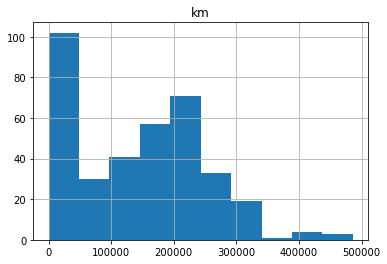

In [17]:
vegleges_tabla.hist("km")

<AxesSubplot:xlabel='km', ylabel='price'>

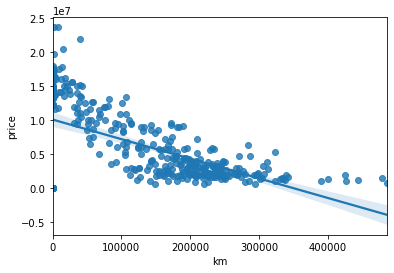

In [18]:
sns.regplot(data=vegleges_tabla,x="km",y="price")

In [20]:
vegleges_tabla.to_csv("rav4_full.csv")

In [21]:
vegleges_tabla.shape

(361, 50)